In [1]:
# Relevant Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None) 

In [3]:
data=pd.read_csv('./data/marketing_customer_analysis.csv')

In [4]:
# Transform and clean data 
def clean_data(df):
    df.columns=[m.lower().replace(' ', '_') for m in df.columns]
    df=df.drop(columns=['unnamed:_0', 'state'])
    df=df.dropna()
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
    return df

In [5]:
clean_data(data)

,customer,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
2,LZ68649,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
10,HG93801,5154.764074,No,Extended,High School or Below,2011-01-02,Employed,M,82730,Urban,Married,127,13.0,31,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A
13,KR82385,5454.587929,No,Basic,Master,2011-01-26,Employed,M,66334,Suburban,Single,69,25.0,25,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A
16,FH51383,5326.677654,No,Basic,High School or Below,2011-02-07,Employed,F,76717,Urban,Married,66,26.0,10,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,3579.023825,No,Extended,High School or Below,2011-01-24,Employed,F,28304,Suburban,Married,91,10.0,30,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A
10903,SU71163,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,Suburban,Married,74,30.0,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
10904,QI63521,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,Suburban,Single,187,14.0,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
10906,KX53892,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A


In [6]:
#Check the data types of the columns. Get the numeric data into 
#dataframe called numerical and categorical columns in a dataframe called categoricals. 
#(You can use np.number and np.object to select the numerical data types and categorical 
#data types respectively)
#Get the numeric data
data_num=data._get_numeric_data()
data_num.head()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645


In [7]:
# Check normality
x = np.random.randn(10000)

In [8]:
x

array([-0.03276367,  0.45538164, -0.33603658, ..., -0.87975923,
        0.24958074, -0.35279173])

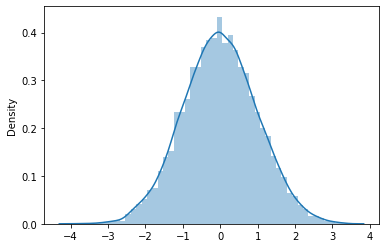

In [9]:
sns.distplot(x)
plt.show()